In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit



In [2]:
data = pd.read_csv("./data.csv")
print(data.head())

# subjects n = 78
n_subjects = max(data["subject"])
n_blocks = max(data["block"])
print("n blocks: ", n_blocks)

train_data = data[data["subject"] < (n_subjects - 10)]
test_data = data[data["subject"] >= (n_subjects - 10)]

rt_data_name = "RT_trimmed" # or RT || log_RT_trimmed

y_train = train_data[rt_data_name].to_numpy()
y_test = test_data[rt_data_name].to_numpy()

# -- Special --  ##
all_y = data[rt_data_name].to_numpy()

X_train = train_data["shape_num"].to_numpy()
X_test = test_data["shape_num"].to_numpy()

print(X_train[1])
print(y_train[1])


"""
Size of trial: 24 * 24
"""

def gen_data(d):
    data = np.empty((0, 24))
    for index in d:
        #print("item?: ", index)
        # Create an array of zeros with length 24
        result_array = np.zeros(24)
        result_array[d[index] - 1] = 1
        data = np.vstack((data, result_array))
    return data

X_train = gen_data(X_train)
X_test = gen_data(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, 24))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 24))

print(X_train[0])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




   subject         ave          sd  block  triplet  position  shape_num    RT  \
0        1  463.309028  298.476633      1        1         1          1  1121   
1        1  463.309028  298.476633      1        1         2          2   886   
2        1  463.309028  298.476633      1        1         3          3   837   
3        1  463.309028  298.476633      1        7         1         19   843   
4        1  463.309028  298.476633      1        7         2         20  1264   

    RT_trimmed  log_RT_trimmed  change?  block>12  block>18  block>6  \
0  1060.262293        6.966272        1     False     False    False   
1   886.000000        6.786717        0     False     False    False   
2   837.000000        6.729824        0     False     False    False   
3   843.000000        6.736967        0     False     False    False   
4  1060.262293        6.966272        1     False     False    False   

   1-avg(2,3)  log_1-avg(2,3) odd_even  
0         NaN             NaN        o 

In [3]:
# def build_network(learning_rate: float = 0.0003):
def build_network(learning_rate: float = 0.0003):
     model = tf.keras.Sequential()
     model.add(tf.keras.Input(shape=(1, 24)))
     model.add(tf.keras.layers.SimpleRNN(units=64, return_sequences = False, activation = "linear"))
     model.add(tf.keras.layers.Dense(1, activation = "linear")) # Linear voor RT's
     model.compile(optimizer = 
         tf.keras.optimizers.Adam(
            learning_rate = learning_rate), 
            loss='mean_squared_error', # voor regressie op RT's
            metrics=[
               tf.keras.metrics.mean_squared_error,
               tf.keras.metrics.mean_absolute_error,
               tf.keras.metrics.mean_absolute_percentage_error]
            )
     return model

In [4]:
def train_model():
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    res = model.fit(X_train, y_train, epochs = 30, batch_size=24, validation_data = (X_test, y_test), verbose=1)
    return res

In [5]:
def show_res(res, verbose: bool = False):
    print(res.history.keys())
    if verbose:
        print(res.history)
    fig, axs = plt.subplots(2,2)
    axs[0, 0].set_title("training loss")
    axs[0, 0].plot(res.history["loss"])
    axs[0, 1].set_title("mean_squared_error")
    axs[0, 1].plot(res.history["mean_squared_error"])
    axs[1, 0].set_title("val_mean_absolute_percentage_error")
    axs[1, 0].plot(res.history["val_mean_absolute_percentage_error"])
    axs[1, 1].set_title("val_mean_absolute_error")
    axs[1, 1].plot(res.history["val_mean_absolute_error"])
    plt.show()

(35136, 1, 24) (35136,) (5184, 1, 24) (5184,)
Epoch 1/30
1464/1464 [==============================] - 2s 967us/step - loss: 1140976.1105 - mean_squared_error: 1140976.1105 - mean_absolute_error: 784.1695 - mean_absolute_percentage_error: 98.7800 - val_loss: 1684368.7500 - val_mean_squared_error: 1684368.7500 - val_mean_absolute_error: 921.3558 - val_mean_absolute_percentage_error: 91.8312
Epoch 2/30
1464/1464 [==============================] - 1s 697us/step - loss: 1035105.5990 - mean_squared_error: 1035105.6086 - mean_absolute_error: 714.7249 - mean_absolute_percentage_error: 84.8092 - val_loss: 1495782.6250 - val_mean_squared_error: 1495782.6250 - val_mean_absolute_error: 813.1865 - val_mean_absolute_percentage_error: 72.8195
Epoch 3/30
1464/1464 [==============================] - 1s 654us/step - loss: 875128.8718 - mean_squared_error: 875128.8718 - mean_absolute_error: 596.7203 - mean_absolute_percentage_error: 61.0771 - val_loss: 1284953.6250 - val_mean_squared_error: 1284953.6250 

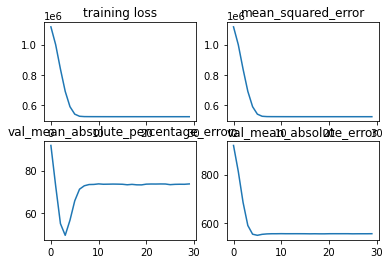

In [6]:
model = build_network()
res = train_model()
model.summary()

show_res(res)

[[824.4354 ]
 [798.27106]
 [772.68445]
 [815.243  ]
 [765.2406 ]
 [767.72174]
 [806.9201 ]
 [779.6831 ]
 [763.59393]
 [804.4649 ]
 [774.46106]
 [769.21375]
 [781.89435]
 [778.5246 ]
 [519.654  ]
 [815.51215]
 [773.6473 ]
 [762.9299 ]
 [827.46234]
 [808.5119 ]
 [785.6082 ]
 [793.48663]
 [745.311  ]
 [772.68445]]
[[815.51215]
 [773.6473 ]
 [762.9299 ]
 [793.48663]
 [745.311  ]
 [772.68445]
 [806.9201 ]
 [779.6831 ]
 [763.59393]
 [824.4354 ]
 [798.27106]
 [772.68445]
 [804.4649 ]
 [774.46106]
 [769.21375]
 [781.89435]
 [778.5246 ]
 [519.654  ]
 [815.243  ]
 [765.2406 ]
 [767.72174]
 [827.46234]
 [808.5119 ]
 [785.6082 ]]
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]


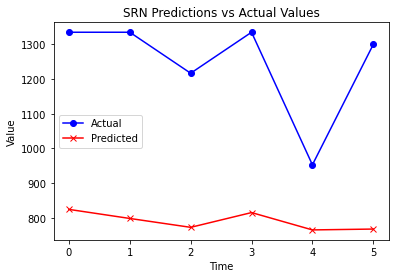

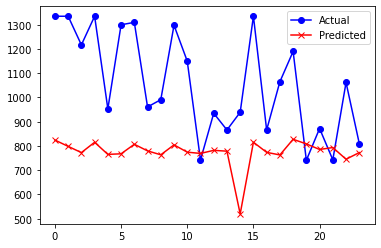

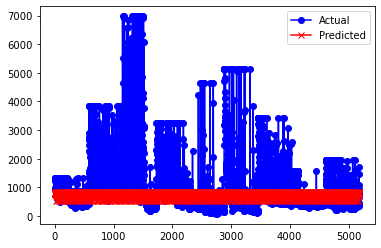

In [7]:
# Show 6 following (3x2)
plt.plot(y_test[:6], label='Actual', color='blue', marker='o')
plt.plot(model.predict(X_test)[:6], label='Predicted', color='red', marker='x')

# Check if model predicts unique and not same 24
print(model.predict(X_test)[:24])
print(model.predict(X_test)[24:48])
print(model.predict(X_test)[:24] == model.predict(X_test)[24:48])

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SRN Predictions vs Actual Values')
plt.legend()
plt.show()

# Show 1 block
plt.plot(y_test[:24], label='Actual', color='blue', marker='o')
plt.plot(model.predict(X_test)[:24], label='Predicted', color='red', marker='x')

plt.legend()
plt.show()

# All test data
plt.plot(y_test, label='Actual', color='blue', marker='o')
plt.plot(model.predict(X_test), label='Predicted', color='red', marker='x')

plt.legend()
plt.show()

Question: While it can predict pattern of increase RT after presentation, doesn't seem to be predicting larger whole decrease over trials

9.0 (5184, 1) 70.0
(40320, 1)
(24,)
1.0
shape full:  (72, 24, 3)
data full:  [[1335.203679 1335.203679 1217.      ]
 [1335.203679  953.       1300.      ]
 [1310.        961.        991.      ]
 [1298.       1150.        742.      ]
 [ 935.        866.        939.      ]
 [1335.203679  866.       1065.      ]
 [1190.        741.        872.      ]
 [ 743.       1062.        810.      ]
 [1062.        873.        838.      ]
 [ 844.        743.        842.      ]
 [1335.203679  584.       1315.      ]
 [ 903.        999.       1335.203679]
 [1154.        736.        961.      ]
 [1304.        749.       1335.203679]
 [ 842.        856.       1077.      ]
 [ 811.        938.       1025.      ]
 [ 844.        774.        834.      ]
 [1248.        714.        966.      ]
 [ 870.       1244.        805.      ]
 [1335.203679 1244.        899.      ]
 [ 964.        931.       1000.      ]
 [ 990.       1265.       1335.203679]
 [1159.       1222.        809.      ]
 [ 716.        685.       

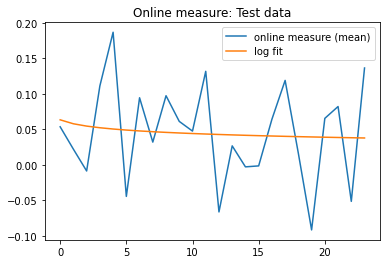

shape full:  (72, 24, 3)
data full:  [[824.4354  798.27106 772.68445]
 [815.243   765.2406  767.72174]
 [806.9201  779.6831  763.59393]
 [804.4649  774.46106 769.21375]
 [781.89435 778.5246  519.654  ]
 [815.51215 773.6473  762.9299 ]
 [827.46234 808.5119  785.6082 ]
 [793.48663 745.311   772.68445]
 [815.51215 773.6473  762.9299 ]
 [793.48663 745.311   772.68445]
 [806.9201  779.6831  763.59393]
 [824.4354  798.27106 772.68445]
 [804.4649  774.46106 769.21375]
 [781.89435 778.5246  519.654  ]
 [815.243   765.2406  767.72174]
 [827.46234 808.5119  785.6082 ]
 [793.48663 745.311   772.68445]
 [815.243   765.2406  767.72174]
 [806.9201  779.6831  763.59393]
 [815.51215 773.6473  762.9299 ]
 [781.89435 778.5246  519.654  ]
 [824.4354  798.27106 772.68445]
 [804.4649  774.46106 769.21375]
 [827.46234 808.5119  785.6082 ]]
shape;  (72, 24) (72, 24) (72, 24)
RT: 808.67737 777.9563 739.2613
log-transofrmed RT: 6.69524 6.6564016 6.597921
online measure shape:  (72, 24)
online measure shape:  [

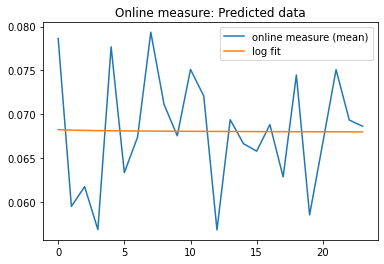

shape full:  (560, 24, 3)
data full:  [[1060.262293  886.        837.      ]
 [ 843.       1060.262293 1060.262293]
 [ 997.       1060.262293 1060.262293]
 [ 717.        716.        685.      ]
 [1060.262293  582.        558.      ]
 [ 624.        686.        963.      ]
 [ 772.        782.        809.      ]
 [1029.        771.        875.      ]
 [1060.262293 1060.262293  898.      ]
 [ 680.        706.        800.      ]
 [ 738.        774.        707.      ]
 [ 769.       1060.262293  873.      ]
 [ 744.        780.        776.      ]
 [ 898.        742.        903.      ]
 [ 842.        739.        587.      ]
 [ 270.        243.        243.      ]
 [ 212.        208.        186.      ]
 [ 177.        182.        218.      ]
 [ 204.        213.        178.      ]
 [ 213.        178.        214.      ]
 [ 209.        249.        716.      ]
 [ 590.        710.        615.      ]
 [ 551.        492.        467.      ]
 [ 456.        396.        342.      ]]
shape;  (560, 24) (560, 2

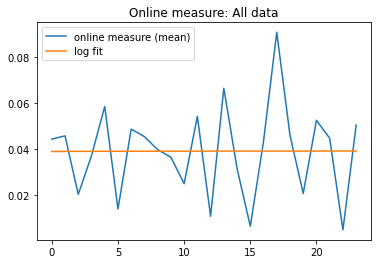

In [8]:
pred = model.predict(X_test)
new_y_test = y_test.reshape(-1, 1)
all_y = all_y.reshape(-1, 1)
print(pred.shape[0]/(24*24), new_y_test.shape, all_y.shape[0]/(24*24))

print(all_y.shape)
all_y = all_y.reshape(-1, 24)
means = np.mean(all_y, axis=1)
means = np.mean(all_y, axis=0)
print(means.shape)
print(means.shape[0]/24)


pred_reshaped = pred.reshape(-1, 3)
test_reshaped = new_y_test.reshape(-1, 3)
y_reshaped = all_y.reshape(-1, 3)

testing_reshaped = test_reshaped.reshape(-1, 24, test_reshaped.shape[1])
predicted_reshaped = pred_reshaped.reshape(-1, 24, pred_reshaped.shape[1])
# Sanity test
all_reshaped = y_reshaped.reshape(-1, 24, y_reshaped.shape[1])

# Logarithmic function
def logarithmic_func(x, a, b):
    return a * np.log(x) + b

# Apply a log fit curve to the online measure
def fit_log(x_data, y_data):
    # Fit the model
    params, covariance = curve_fit(logarithmic_func, x_data, y_data)
    # Extract the parameters
    a, b = params
    # Generate fitted y values
    y_fit = logarithmic_func(x_data, a, b)
    return y_fit

def data_anal(data, label):
    print("shape full: ", data.shape)
    print("data full: ", data[0])
    # Values
    first_column = data[:, :, 0]
    second_column = data[:, :, 1]
    third_column = data[:, :, 2]
    
    print("shape; ", first_column.shape, second_column.shape, third_column.shape)

    # Bereken online_measure
    online_measure = np.log(first_column) - ( (np.log(second_column) + np.log(third_column)) / 2 )
    # Alternatief
    # online_measure = np.log(first_column) - np.mean(np.log(np.stack((second_column, third_column), axis=-1)), axis=-1)
    
    print("RT:", np.mean(first_column), np.mean(second_column), np.mean(third_column))
    print("log-transofrmed RT:", np.mean(np.log(first_column)), np.mean(np.log(second_column)), np.mean(np.log(third_column)))
    
    # Fit log to online measure
    print("online measure shape: ", online_measure.shape)
    print("online measure shape: ", online_measure[0])
    #online_measure = online_measure.reshape(-1, 24)
    
    #fit = fit_log(range(1,24+1), np.mean(online_measure, axis=0))
    fit = fit_log(
        range(1,24+1),
        #np.mean(online_measure, axis=0)
        np.mean(online_measure.reshape(-1, 24), axis=0)
    )
    #np.mean(online_measure.reshape(-1, 24), axis=1)
    print("online measure shape: ", online_measure[0])

    print("online measure shape: ", online_measure.shape)
    print("-->", online_measure[0,1]) # compare with real datasheet

    plt.plot(
        #np.mean(online_measure, axis=0),
        np.mean(online_measure.reshape(-1, 24), axis=0),
        label="online measure (mean)"
    )
    plt.plot(fit, label="log fit")
    
    plt.title(f"Online measure: {label}")
    plt.legend()
    plt.show()


data_anal(data=testing_reshaped, label="Test data")
data_anal(data=predicted_reshaped, label="Predicted data")
data_anal(data=all_reshaped, label="All data")

